In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import time

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

from scipy.optimize import least_squares

plt.rcParams.update(plt.rcParamsDefault)

In [21]:
import cv2

img = cv2.imread('O2-O2_10->9_merged.png', cv2.IMREAD_GRAYSCALE)

print(img.shape)

cv2.imwrite('O2-O2_10->9_gray.png', img)


(480, 640)


True

10 10


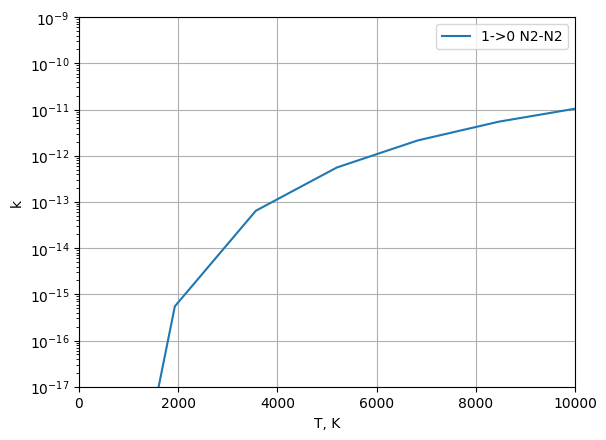

In [14]:



X = [300, 1933.33333333, 3566.66666667, 5200, 6833.33333333, 8466.66666667,
     10100, 11733.33333333, 13366.66666667, 15000]
y = np.array([1.1041e-30, 5.4963e-22, 6.4435e-20, 5.5634e-19, 2.1474e-18, 5.4615e-18, 1.0848e-17,
     1.8373e-17, 2.7910e-17, 3.9226e-17])*1000000
print(len(y), len(X))

ax = plt.gca()
ax.set_xlim([0,10000])
ax.set_ylim([1e-17,1e-9])
plt.plot(X, y, label='1->0 N2-N2')
plt.yscale("logit")
plt.xlabel("T, K")
plt.ylabel("k")
plt.legend()
plt.grid()
plt.show()

16 16


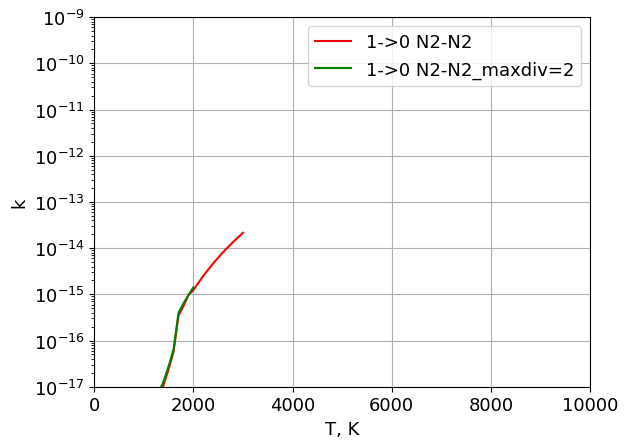

In [27]:

X = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2200, 2400, 2600, 2800, 3000]
y = np.array([ 1.7944e-24, 2.7802e-24, 4.0429e-24, 6.1156e-24, 1.0980e-23, 2.4053e-23, 5.7412e-23, 3.4617e-22, 5.5662e-22, 
              9.6097e-22, 1.2435e-21, 2.51460e-21, 4.69348e-21, 8.20393e-21, 1.35774e-20, 2.14571e-20])*1000000
print(len(y), len(X))

X_1 = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
y_1 = np.array([2.2653e-24, 3.5060e-24, 5.0703e-24, 7.5305e-24, 1.3049e-23, 2.7557e-23, 6.4293e-23, 3.9684e-22, 6.3664e-22, 9.6097e-22, 1.4113e-21])*1000000

ax = plt.gca()
ax.set_xlim([0,10000])
ax.set_ylim([1e-17,1e-9])
plt.plot(X, y, 'r', label='1->0 N2-N2')
plt.plot(X_1, y_1, 'g', label='1->0 N2-N2_maxdiv=2')
plt.yscale("logit")
plt.xlabel("T, K")
plt.ylabel("k")
plt.legend()
plt.grid()
plt.savefig('N2-N2_1->0.png', dpi=300)
#plt.show()




In [8]:
def get_coef(coef, T, coef_num):
    A = np.polynomial.polynomial.Polynomial(coef=coef[0:coef_num])
    #B = np.polynomial.polynomial.Polynomial(coef=coef[coef_num:2*coef_num])
    #C = np.polynomial.polynomial.Polynomial(coef=coef[2*coef_num:])
    return A(T**(-1/3))#*np.exp(B(T**(-1/3))) #+ C(T**(-1/3))

def mape_loss(coef, T, k, coef_num, regul_coef):
    A = np.polynomial.polynomial.Polynomial(coef=coef[0:coef_num])
    #B = np.polynomial.polynomial.Polynomial(coef=coef[coef_num:2*coef_num])
    #C = np.polynomial.polynomial.Polynomial(coef=coef[2*coef_num:])
    pred_val = A(T**(-1/3))#*np.exp(B(T**(-1/3))) #+ C(T**(-1/3))
    return np.abs((k - pred_val)/k) + regul_coef*np.sum(np.abs(coef))

def smape_loss(coef, T, k, coef_num, regul_coef):
    A = np.polynomial.polynomial.Polynomial(coef=coef[0:coef_num])
    #B = np.polynomial.polynomial.Polynomial(coef=coef[coef_num:2*coef_num])
    #C = np.polynomial.polynomial.Polynomial(coef=coef[2*coef_num:])
    pred_val = A(T**(-1/3))#*np.exp(B(T**(-1/3))) #+ C(T**(-1/3))
    return np.abs(pred_val - k)/(np.abs(pred_val)+np.abs(k))/2 + regul_coef*np.sum(coef**2)
    
def rmsle_loss(coef, T, k, coef_num, regul_coef):
    A = np.polynomial.polynomial.Polynomial(coef=coef[0:coef_num])
    B = np.polynomial.polynomial.Polynomial(coef=coef[coef_num:2*coef_num])
    C = np.polynomial.polynomial.Polynomial(coef=coef[2*coef_num:])
    pred_val = A(T**(-1/3))*np.exp(B(T**(-1/3))) + C(T**(-1/3))
    return np.log((k+1)/(pred_val+1))**2

1
BEST_POLY_LEN: 6
BEST SCORE: 8.18952721649373e-05
BEST COEFS: [-7.31403074e-01 -4.53472618e+00  1.65558482e+02 -4.12608185e+03
  3.77793031e+04 -1.23137950e+05]
--- 2.4833431243896484 seconds ---
5
BEST_POLY_LEN: 6
BEST SCORE: 0.0016449810805994924
BEST COEFS: [-8.76364713e-01  4.29006840e+00 -1.52664766e+02  2.05485339e+03
 -1.95740858e+04  7.84768062e+04]
--- 2.2362051010131836 seconds ---
10
BEST_POLY_LEN: 6
BEST SCORE: 1.9125548748703142e-05
BEST COEFS: [-9.07084201e-01  3.75031281e+00 -1.15029326e+02  1.28555568e+03
 -1.09035378e+04  3.93644872e+04]
--- 2.2652406692504883 seconds ---


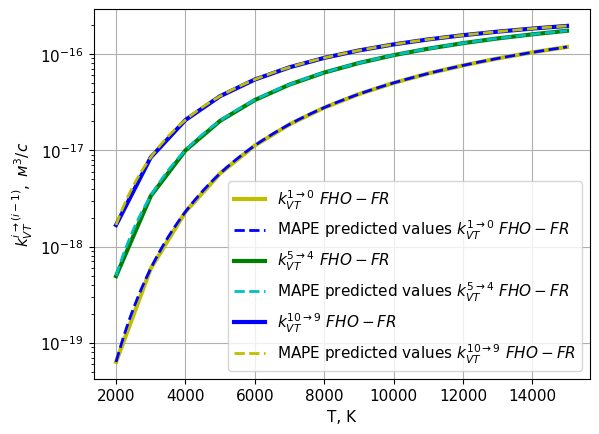

In [20]:
df = pd.read_csv('kvt_FHO-FR_MM_O2-O2_FULL.txt', sep=' ')

with open('coefs_O2_O2.txt', 'w') as coef_file:
    max_poly_len = 6
    for k in [1, 5, 10]: #range(1,4):
        start_time = time.time()
        print(k)
        X = df[df['i']==k]['T']
        y = np.log(df[df['i']==k]['kVT'])
        norm_y = y.abs().max()
        y = y / norm_y

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        T_1 = X.min()
        T_2 = 15000

        X_for_score1 = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['T']
        y_for_score = np.log(df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['kVT']) / norm_y

        X_for_figure1 = np.linspace(T_1, T_2, 100000)

        best_score1 = 100

        for i in range(1,max_poly_len+1): 
                #print(i)
                coef_num = i
                regul_coef= 0 #1e1
                x0 = np.ones(coef_num)#*1e-15

                res_mape = least_squares(mape_loss, 
                                         x0, 
                                         method='lm', 
                                         args=(X_train, y_train, coef_num, regul_coef))

                y_mape = np.array([get_coef(res_mape.x, xs, coef_num) for xs in X_for_figure1])

                #if np.all(y_mape > 0):
                    #print(f"Coefs: {res_mape.x}")

                MAPE_score1 = np.sum([mape_loss(res_mape.x, *pair, coef_num, 0) for pair in zip(X_for_score1, y_for_score)])/len(X_for_score1)*100
                #print(f'MAPE_score: {MAPE_score1} %')

                if MAPE_score1 < best_score1:
                    best_score1 = MAPE_score1
                    best_coefs1 = res_mape.x
                    poly_len1 = i

                    #plt.plot(X, y, label=r'$k_{VT}^{1 \to 0}~FHO-FR$')
                    #plt.plot(X_for_figure1, y_mape, label='MAPE loss')
                    #plt.yscale("logit")
                    #plt.xlabel("T, K")
                    #plt.ylabel("k")
                    #plt.grid()
                    #plt.legend()
                    #plt.show()

        print(f'BEST_POLY_LEN: {poly_len1}')
        print(f'BEST SCORE: {best_score1}')
        print(f'BEST COEFS: {best_coefs1}')

        if len(best_coefs1) < max_poly_len: 
            best_coefs1 = list(best_coefs1) + [0]*(max_poly_len - len(best_coefs1))
        line = [norm_y, *best_coefs1]
        coef_file.write(' '.join(map(str, line)) + '\n')


        X = df[df['i']==k]['T']
        y = df[df['i']==k]['kVT']

        y_mape = np.exp(y_mape*norm_y)
        print("--- %s seconds ---" % (time.time() - start_time))
        
        levels = rf'{k} \to {k-1}'
        label_k = r'$k_{VT}^' + r'{' + levels + r'}' + r'~FHO-FR$'
        
        if k == 1:
            plt_color1 = 'y'
            plt_color2 = 'b--'
        elif k == 5:
            plt_color1 = 'g'
            plt_color2 = 'c--'
        else:
            plt_color1 = 'b'
            plt_color2 = 'y--'


        # print(f'X: {X}')
        # print(f'y: {y}')
        # print(f'X_for_figure1: {X_for_figure1}')
        # print(f'y_mape: {y_mape}')
        
        plt.rcParams.update({'font.size': 11})
        plt.plot(X, y, plt_color1, label=label_k, linewidth=3)
        plt.plot(X_for_figure1, y_mape, plt_color2, label='MAPE predicted values ' + label_k, linewidth=2)
        ax = plt.gca()
        #ax.set_xlim([0,10000])
        #ax.set_ylim([1e-17,1e-9])
        plt.yscale("logit")
        plt.xlabel("T, K")
        plt.ylabel(r"$k_{VT}^{i \to (i-1)},~м^3/c$")
        plt.grid()
        plt.legend()
    plt.savefig(f'O2-O2_{k}->{k-1}_merged.png')
        #plt.show()
    #plt.savefig('res_regression_MM.png', dpi=500, bbox_inches='tight')

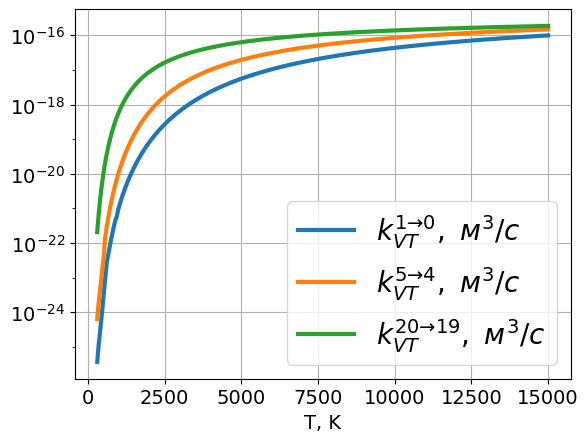

In [46]:
X1 = df[df['i']==1]['T']
y1 = df[df['i']==1]['kVT']
X5 = df[df['i']==5]['T']
y5 = df[df['i']==5]['kVT']
X20 = df[df['i']==20]['T']
y20 = df[df['i']==20]['kVT']

plt.rcParams.update({'font.size': 14})
plt.plot(X1, y1, label = r'$k_{VT}^{1 \to 0},~м^3/c$', linewidth=3)
plt.plot(X5, y5, label = r'$k_{VT}^{5 \to 4},~м^3/c$', linewidth=3)
plt.plot(X20, y20, label = r'$k_{VT}^{20 \to 19},~м^3/c$', linewidth=3)
plt.yscale("logit")
plt.xlabel("T, K")
#plt.ylabel()
plt.legend(loc='lower right', fontsize="20")
plt.grid()
plt.savefig('viborka_O2-O.png', dpi=300)

29


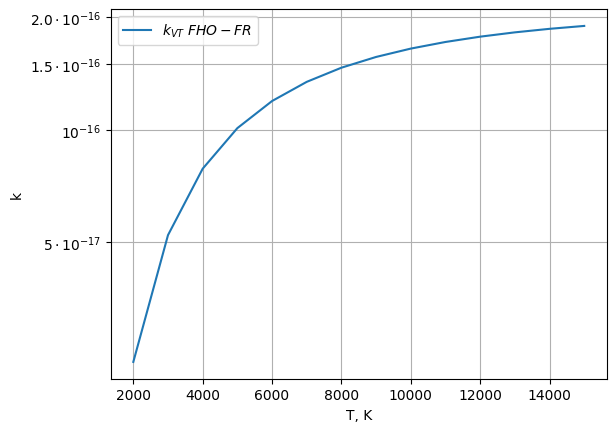

In [16]:
df = pd.read_csv('kvt_FHO-FR_MM_O2-O2_i29.txt', sep=' ')

for k in [29]:
    print(k)
    X = df[df['i']==k]['T']
    y = df[df['i']==k]['kVT']
    
    plt.plot(X, y, label=r'$k_{VT}~FHO-FR$')
    plt.yscale("logit")
    plt.xlabel("T, K")
    plt.ylabel("k")
    plt.grid()
    plt.legend()
    plt.show()

## Part 1 - 300 - 1000 K

In [9]:
df = pd.read_csv('kvt_FHO-FR.txt', sep=' ') #'kvt_FHO-FR_1_35.txt', sep=' ')
#with open('./poly_coefs.csv', 'w', newline='') as f:
    #writer = csv.writer(f)

for k in range(1,2): #36):
    X = df[df['i']==k]['T']
    y = np.log(df[df['i']==k]['kVT'])
    norm_y = y.abs().max()
    y = y / norm_y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    T_1 = X.min()
    T_2 = 1000

    X_for_score1 = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['T']
    y_for_score = np.log(df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['kVT']) / norm_y

    X_for_figure1 = np.linspace(T_1, T_2, 1000)

    best_score1 = 100

    for i in range(4,41): 
        #print(i)
        coef_num = i
        regul_coef= 0 #1e1
        x0 = np.ones(coef_num*1)*1e-15

        res_mape = least_squares(mape_loss, 
                                 x0, 
                                 method='lm', 
                                 args=(X_train, y_train, coef_num, regul_coef))

        y_mape = np.array([get_coef(res_mape.x, xs, coef_num) for xs in X_for_figure1])

        #if np.all(y_mape > 0):
            #print(f"Coefs: {res_mape.x}")

        MAPE_score1 = np.sum([mape_loss(res_mape.x, *pair, coef_num, 0) for pair in zip(X_for_score1, y_for_score)])/len(X_for_score1)*100
        print(f'MAPE_score: {MAPE_score1} %')

        if MAPE_score1 < best_score1:
            best_score1 = MAPE_score1
            best_coefs1 = res_mape.x
            poly_len1 = i

            #plt.plot(X, y, label='true')
            #plt.plot(X_for_figure1, y_mape, label='MAPE loss')
            #plt.yscale("logit")
            #plt.xlabel("T")
            #plt.ylabel("k")
            #plt.grid()
            #plt.legend()
            #plt.show()

    print(f'BEST_POLY_LEN: {poly_len1}')
    print(f'BEST SCORE: {best_score1}')
    print(f'BEST COEFS: {best_coefs1}')  


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

    T_1 = 800
    T_2 = 2200

    X_for_score2 = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['T']
    y_for_score = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['kVT']

    X_for_figure2 = np.linspace(T_1, T_2, 1000)

    best_score2 = 100

    for i in range(3,41): 
        #print(i)
        coef_num = i
        regul_coef= 0 #1e1
        x0 = np.ones(coef_num*1)*1e-15

        res_mape = least_squares(mape_loss, 
                                 x0, 
                                 method='lm', 
                                 args=(X_train, y_train, coef_num, regul_coef))

        y_mape = np.array([get_coef(res_mape.x, xs, coef_num) for xs in X_for_figure2])

        if np.all(y_mape > 0):
            #print(f"Coefs: {res_mape.x}")

            MAPE_score2 = np.sum([mape_loss(res_mape.x, *pair, coef_num, 0) for pair in zip(X_for_score2, y_for_score)])/len(X_for_score2)*100
            #print(f'MAPE_score: {MAPE_score} %')

            if MAPE_score2 < best_score2:
                best_score2 = MAPE_score2
                best_coefs2 = res_mape.x
                poly_len2 = i

            #plt.plot(X, y, label='true')
            #plt.plot(X_for_figure2, y_mape, label='MAPE loss')
            #plt.yscale("logit")
            #plt.xlabel("T")
            #plt.ylabel("k")
            #plt.grid()
            #plt.legend()
            #plt.show()

    print(f'BEST_POLY_LEN: {poly_len2}')
    print(f'BEST SCORE: {best_score2}')
    print(f'BEST COEFS: {best_coefs2}')  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

    T_1 = 1800
    T_2 = X.max()

    X_for_score3 = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['T']
    y_for_score = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['kVT']

    X_for_figure3 = np.linspace(T_1, T_2, 1000)

    best_score3 = 100

    for i in range(3,31): 
        #print(i)
        coef_num = i
        regul_coef= 1e20
        x0 = np.ones(coef_num*1)*1e-15

        res_smape = least_squares(smape_loss, 
                                  x0, 
                                  method='lm', 
                                  args=(X_train, y_train, coef_num, regul_coef))

        y_smape = np.array([get_coef(res_smape.x, xs, coef_num) for xs in X_for_figure3])

        if np.all(y_smape > 0):
            #print(f"Coefs: {res_smape.x}")

            SMAPE_score = np.sum([smape_loss(res_smape.x, *pair, coef_num, 0) for pair in zip(X_for_score3, y_for_score)])/len(X_for_score3)*100
            #print(f'MAPE_score: {SMAPE_score} %')

            if SMAPE_score < best_score3:
                best_score3 = SMAPE_score
                best_coefs3 = res_smape.x
                poly_len3 = i

            #plt.plot(X, y, label='true')
            #plt.plot(X_for_figure3, y_smape, label='SMAPE loss')
            #plt.yscale("logit")
            #plt.xlabel("T")
            #plt.ylabel("k")
            #plt.grid()
            #plt.legend()
            #plt.show()

    print(f'BEST_POLY_LEN: {poly_len3}')
    print(f'BEST SCORE: {best_score3}')
    print(f'BEST COEFS: {best_coefs3}') 

    FULL_SCORE = 100*(best_score1/100*len(X_for_score1) + best_score2/100*len(X_for_score2) + best_score3/100*len(X_for_score3))/(len(X_for_score1)+len(X_for_score2)+len(X_for_score3))
    print(f'FULL_SCORE: {FULL_SCORE}')

    #writer.writerow(best_coefs1)
    #writer.writerow(best_coefs2)
    #writer.writerow(best_coefs3)

MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score: 100.00000000000009 %
MAPE_score

NameError: name 'poly_len1' is not defined

In [ ]:
X_transition_1_2 = np.linspace(700, 1000, 1000)
X_transition_2_3 = np.linspace(2000, 2400, 1000)

X_for_figure1 = np.linspace(300, 700, 1000)
X_for_figure2 = np.linspace(1000, 2000, 1000)
X_for_figure3 = np.linspace(2400, 15000, 1000)

f_1_2 = [(get_coef(best_coefs1, x, poly_len1)**5 + get_coef(best_coefs2, x, poly_len2)**5)**(1/5) for x in X_transition_1_2]
f_2_3 = [(get_coef(best_coefs2, x, poly_len2)**5 + get_coef(best_coefs3, x, poly_len3)**5)**(1/5) for x in X_transition_2_3]

plt.plot(X, y, 'black', label=r'$k_{VT}^{5 \to 4}~FHO-FR$')
plt.plot(X_for_figure1, [get_coef(best_coefs1, T, poly_len1) for T in X_for_figure1], label=r'$MAPE~ для ~T = 300-1000~K$')
plt.plot(X_transition_1_2, f_1_2, label=r'$f_{~transition~}^{~I-II}(T)$')
plt.plot(X_for_figure2, [get_coef(best_coefs2, T, poly_len2) for T in X_for_figure2], label=r'$MAPE~ для ~T = 800-2200~K$')
plt.plot(X_transition_2_3, f_2_3, label=r'$f_{~transition~}^{~II-III}(T)$')
plt.plot(X_for_figure3, [get_coef(best_coefs3, T, poly_len3) for T in X_for_figure3], label=r'$SMAPE~ для~ T = 1800-15000~K$')
plt.yscale("logit")
plt.xlabel("T, K")
plt.ylabel(r"$k_{VT}^{5 \to 4},~м^3/c$")
plt.grid()
plt.legend(loc='lower right', fontsize="12")
#plt.show()
plt.savefig('img4.png', dpi=300)

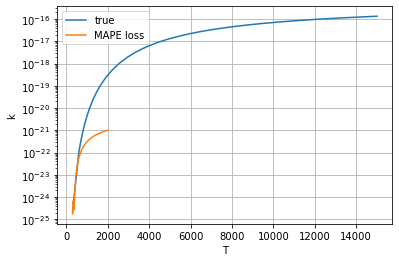

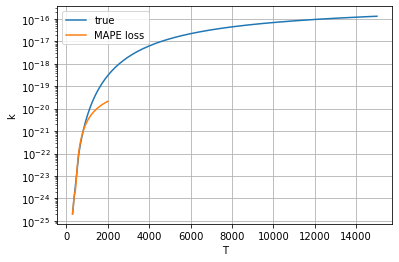

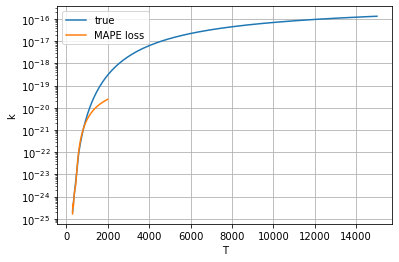

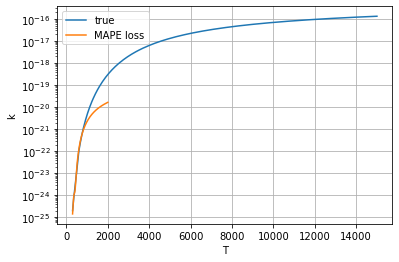

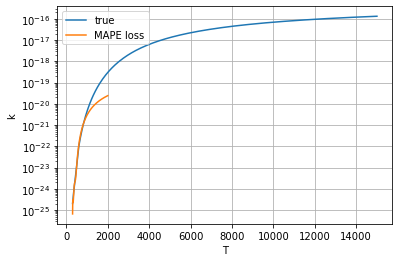

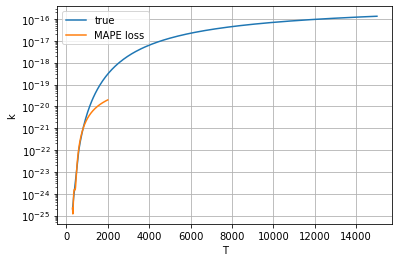

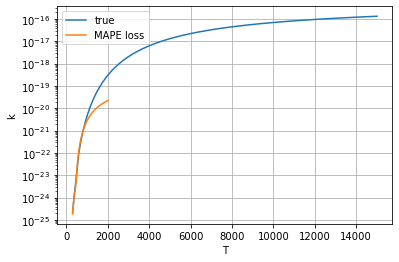

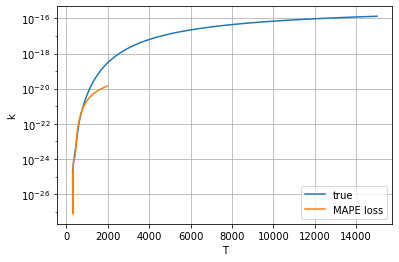

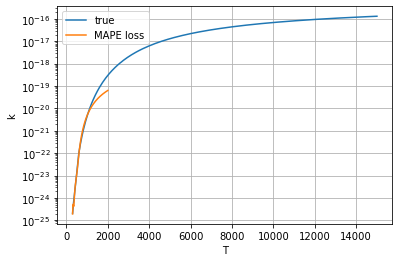

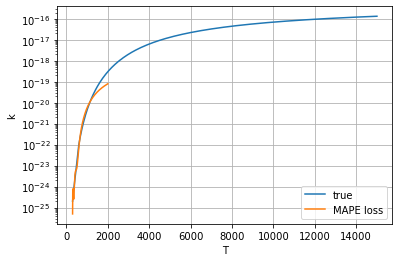

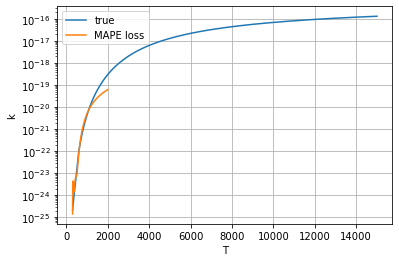

BEST_POLY_LEN: 29
BEST SCORE: 31.121531279640756
BEST COEFS: [ 9.62341621e-18 -4.03492047e-16  6.94525409e-15 -6.20684736e-14
  2.94328446e-13 -6.22065828e-13  3.90998554e-15  1.20908249e-12
  1.01219257e-12 -6.67814867e-13  8.45774764e-13 -1.78900939e-12
  1.67018530e-12 -1.79213340e-12  1.04078737e-15  1.04078737e-15
  1.04078737e-15  1.04078737e-15  1.04078737e-15  1.04078737e-15
 -9.16859550e-15  1.38570616e-14  5.39550970e-13  4.49970488e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15]


In [8]:
df = pd.read_csv('kvt_FHO-FR.txt', sep=' ')
k =3 
X = df[df['i']==k]['T']
y = df[df['i']==k]['kVT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

T_1 = X.min()
T_2 = 2000

X_for_score1 = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['T']
y_for_score = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['kVT']

X_for_figure1 = np.linspace(T_1, T_2, 1000)

best_score1 = 100

for i in range(4,41): 
    #print(i)
    coef_num = i
    regul_coef= 0 #1e1
    x0 = np.ones(coef_num*1)*1e-15

    res_mape = least_squares(mape_loss, 
                             x0, 
                             method='lm', 
                             args=(X_train, y_train, coef_num, regul_coef))
    
    y_mape = np.array([get_coef(res_mape.x, xs, coef_num) for xs in X_for_figure1])
    
    if np.all(y_mape > 0):
        #print(f"Coefs: {res_mape.x}")
        
        MAPE_score1 = np.sum([mape_loss(res_mape.x, *pair, coef_num, 0) for pair in zip(X_for_score1, y_for_score)])/len(X_for_score1)*100
        #print(f'MAPE_score: {MAPE_score} %')

        if MAPE_score1 < best_score1:
            best_score1 = MAPE_score1
            best_coefs1 = res_mape.x
            poly_len1 = i
        
        plt.plot(X, y, label='true')
        plt.plot(X_for_figure1, y_mape, label='MAPE loss')
        plt.yscale("logit")
        plt.xlabel("T")
        plt.ylabel("k")
        plt.grid()
        plt.legend()
        plt.show()
        
print(f'BEST_POLY_LEN: {poly_len1}')
print(f'BEST SCORE: {best_score1}')
print(f'BEST COEFS: {best_coefs1}')  

## Part 2 - 1000 - 2200 K


In [240]:
df = pd.read_csv('kvt_FHO-FR_1_35.txt', sep=' ')


X = df[df['i']==k]['T']
y = df[df['i']==k]['kVT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

T_1 = 800
T_2 = 2200

X_for_score2 = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['T']
y_for_score = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['kVT']

X_for_figure2 = np.linspace(T_1, T_2, 1000)

best_score2 = 100

for i in range(3,41): 
    #print(i)
    coef_num = i
    regul_coef= 0 #1e1
    x0 = np.ones(coef_num*1)*1e-15

    res_mape = least_squares(mape_loss, 
                             x0, 
                             method='lm', 
                             args=(X_train, y_train, coef_num, regul_coef))
    
    y_mape = np.array([get_coef(res_mape.x, xs, coef_num) for xs in X_for_figure2])
    
    if np.all(y_mape > 0):
        #print(f"Coefs: {res_mape.x}")
        
        MAPE_score2 = np.sum([mape_loss(res_mape.x, *pair, coef_num, 0) for pair in zip(X_for_score2, y_for_score)])/len(X_for_score2)*100
        #print(f'MAPE_score: {MAPE_score} %')

        if MAPE_score2 < best_score2:
            best_score2 = MAPE_score2
            best_coefs2 = res_mape.x
            poly_len2 = i
        
        #plt.plot(X, y, label='true')
        #plt.plot(X_for_figure2, y_mape, label='MAPE loss')
        #plt.yscale("logit")
        #plt.xlabel("T")
        #plt.ylabel("k")
        #plt.grid()
        #plt.legend()
        #plt.show()
        
print(f'BEST_POLY_LEN: {poly_len2}')
print(f'BEST SCORE: {best_score2}')
print(f'BEST COEFS: {best_coefs2}')  

BEST_POLY_LEN: 35
BEST SCORE: 1.2031233552964498
BEST COEFS: [ 1.83821555e-16  1.12629820e-14 -4.99916034e-13  7.18321441e-12
 -4.85415757e-11  1.52419874e-10 -1.40442827e-10 -1.47073468e-10
 -6.61768035e-11 -1.84003348e-11 -5.21484167e-15  2.36447947e-11
  7.85906682e-16  7.85906682e-16  7.85906682e-16  7.85906682e-16
  7.85906682e-16  7.85906682e-16  7.85906682e-16  7.85906682e-16
  7.85906682e-16  7.85906682e-16  7.85906682e-16  7.85906682e-16
  7.85906682e-16  7.85906682e-16  3.59533350e-15  9.63834946e-16
  1.09090964e-15  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15]


## Part 3 - 1800 - 15000 K


In [241]:
df = pd.read_csv('kvt_FHO-FR_1_35.txt', sep=' ')



X = df[df['i']==k]['T']
y = df[df['i']==k]['kVT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

T_1 = 1800
T_2 = X.max()

X_for_score3 = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['T']
y_for_score = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == k)]['kVT']

X_for_figure3 = np.linspace(T_1, T_2, 1000)

best_score3 = 100

for i in range(3,31): 
    #print(i)
    coef_num = i
    regul_coef= 1e20
    x0 = np.ones(coef_num*1)*1e-15

    res_smape = least_squares(smape_loss, 
                              x0, 
                              method='lm', 
                              args=(X_train, y_train, coef_num, regul_coef))
    
    y_smape = np.array([get_coef(res_smape.x, xs, coef_num) for xs in X_for_figure3])
    
    if np.all(y_smape > 0):
        #print(f"Coefs: {res_smape.x}")
        
        SMAPE_score = np.sum([smape_loss(res_smape.x, *pair, coef_num, 0) for pair in zip(X_for_score3, y_for_score)])/len(X_for_score3)*100
        #print(f'MAPE_score: {SMAPE_score} %')

        if SMAPE_score < best_score3:
            best_score3 = SMAPE_score
            best_coefs3 = res_smape.x
            poly_len3 = i
        
        #plt.plot(X, y, label='true')
        #plt.plot(X_for_figure3, y_smape, label='SMAPE loss')
        #plt.yscale("logit")
        #plt.xlabel("T")
        #plt.ylabel("k")
        #plt.grid()
        #plt.legend()
        #plt.show()
        
print(f'BEST_POLY_LEN: {poly_len3}')
print(f'BEST SCORE: {best_score3}')
print(f'BEST COEFS: {best_coefs3}')  

BEST_POLY_LEN: 18
BEST SCORE: 0.9204649244042052
BEST COEFS: [ 6.17856119e-16 -1.44994809e-14  1.06371550e-13 -9.29693385e-14
 -1.79311155e-12  4.66156659e-12  2.60086127e-12  8.58774712e-13
  8.14031623e-13 -1.35310850e-13 -1.38695112e-13  1.52168025e-15
  6.96225888e-18  8.20875490e-17 -1.31293093e-16 -1.71290545e-16
  9.81487177e-16  9.81487177e-16]


In [242]:
FULL_SCORE = 100*(best_score1/100*len(X_for_score1) + best_score2/100*len(X_for_score2) + best_score3/100*len(X_for_score3))/(len(X_for_score1)+len(X_for_score2)+len(X_for_score3))
FULL_SCORE

1.3100159891055445

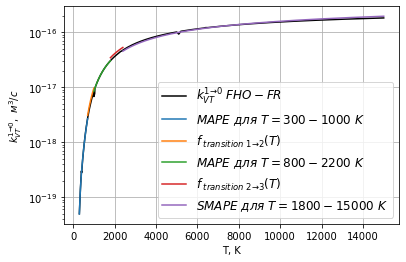

In [243]:
X_transition_1_2 = np.linspace(700, 1000, 1000)
X_transition_2_3 = np.linspace(1800, 2400, 1000)

X_for_figure1 = np.linspace(300, 700, 1000)
X_for_figure2 = np.linspace(1000, 1800, 1000)
X_for_figure3 = np.linspace(2400, 15000, 1000)

f_1_2 = [(get_coef(best_coefs1, x, poly_len1)**5 + get_coef(best_coefs2, x, poly_len2)**5)**(1/5) for x in X_transition_1_2]
f_2_3 = [(get_coef(best_coefs2, x, poly_len2)**5 + get_coef(best_coefs3, x, poly_len3)**5)**(1/5) for x in X_transition_2_3]

plt.plot(X, y, 'black', label=r'$k_{VT}^{1 \to 0}~FHO-FR$')
plt.plot(X_for_figure1, [get_coef(best_coefs1, T, poly_len1) for T in X_for_figure1], label=r'$MAPE~ для ~T = 300-1000~K$')
plt.plot(X_transition_1_2, f_1_2, label=r'$f_{~transition~ 1 \to 2}(T)$')
plt.plot(X_for_figure2, [get_coef(best_coefs2, T, poly_len2) for T in X_for_figure2], label=r'$MAPE~ для ~T = 800-2200~K$')
plt.plot(X_transition_2_3, f_2_3, label=r'$f_{~transition~ 2 \to 3}(T)$')
plt.plot(X_for_figure3, [get_coef(best_coefs3, T, poly_len3) for T in X_for_figure3], label=r'$SMAPE~ для~ T = 1800-15000~K$')
plt.yscale("logit")
plt.xlabel("T, K")
plt.ylabel(r"$k_{VT}^{1 \to 0},~м^3/c$")
plt.grid()
plt.legend(loc='lower right', fontsize="12")
#plt.show()
plt.savefig('img_2.png', dpi=300)

In [10]:
plt.rcParams['figure.figsize'] = [8, 5]

In [73]:
def transition_1(coefs1, coefs2, poly_len1, poly_len2, T1, T2, p):
    X_transition = np.linspace(T1, T2, 100)
    return X_transition, np.array([(get_coef(coefs1, x, poly_len1)**p + get_coef(coefs2, x, poly_len2)**p)**(1/p) for x in X_transition])

In [96]:
def kvt(df, T_pairs, T_dev, test_sizes, levels_count):
    poly_lens = []
    best_scores = []
    best_coefs = []
    
    for i in range(0, levels_count):
        X_i = df[df['i']==i+1]['T']
        y_i = df[df['i']==i+1]['kVT']
        
        
        X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=test_sizes[i])

        T_1 = T_pairs[i][0]
        T_2 = T_pairs[i][1]
        
        if T_2 == 15000:
            metric_name = 'SMAPE'
            metric = smape_loss
        else:
            metric_name = 'MAPE'
            metric = mape_loss
        
        X_for_score = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == i)]['T']
        y_for_score = df[(df['T'] >= T_1) & (df['T'] <= T_2) & (df['i'] == i)]['kVT']

        X_for_figure = np.linspace(T_1, T_2, 1000)

        best_score = 100

        for j in range(3,41): 
            print(f'Poly_size: {j}')
            coef_num = j
            regul_coef= 0 #1e1
            x0 = np.ones(coef_num*1)*1e-15

            res_metric = least_squares(metric, 
                                       x0, 
                                       method='lm', 
                                       args=(X_train, y_train, coef_num, regul_coef))

            y_predict = np.array([get_coef(res_metric.x, xs, coef_num) for xs in X_for_figure])

            if np.all(y_predict > 0):
                print(f"Coefs: {res_metric.x}")

                score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100
                print(f'{metric_name}_score: {score} %')

                if score < best_score:
                    best_score = score
                    best_coef = res_metric.x
                    poly_len = j

                plt.plot(X, y, label='true')
                plt.plot(X_for_figure, y_predict, label=f'{metric_name} loss')
                plt.yscale("logit")
                plt.xlabel("T")
                plt.ylabel("k")
                plt.grid()
                plt.legend()
                plt.show()
        
        poly_lens.append(poly_len)
        best_scores.append(best_score)
        best_coefs.append(best_coef)
        
        print(f'BEST_POLY_LEN{i}: {poly_len}')
        print(f'BEST SCORE{i}: {best_score}')
        print(f'BEST COEFS{i}: {best_coef}')
        print('--------------------------------------------------------------------------------')
        
        

Poly_size: 3
Coefs: [ 7.62716351e-23 -1.03918228e-21  3.54106854e-21]
MAPE_score: nan %


<ipython-input-96-3264d6b085e0>:46: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100


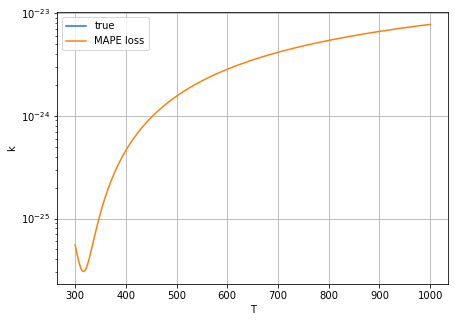

Poly_size: 4
Coefs: [ 1.99622724e-21 -4.17523801e-20  2.91006649e-19 -6.75864213e-19]
MAPE_score: nan %


<ipython-input-96-3264d6b085e0>:46: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100


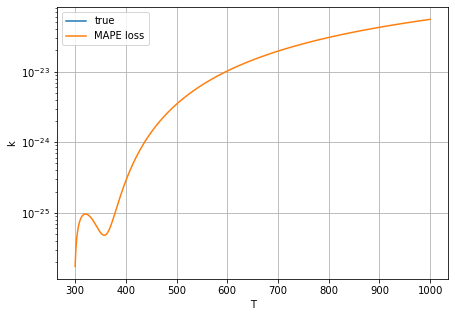

Poly_size: 5
Poly_size: 6
Coefs: [ 2.78057947e-19 -9.90476089e-18  1.41077434e-16 -1.00433586e-15
  3.57357160e-15 -5.08409133e-15]
MAPE_score: nan %


<ipython-input-96-3264d6b085e0>:46: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100


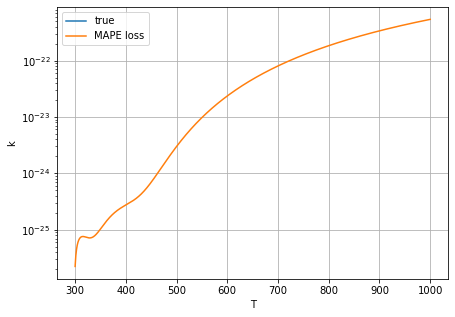

Poly_size: 7
Poly_size: 8
Coefs: [ 3.28047375e-19 -1.06575405e-17  1.29411556e-16 -6.51964791e-16
  3.84414676e-16  7.77441889e-15 -1.98736450e-14  3.50117856e-16]
MAPE_score: nan %


<ipython-input-96-3264d6b085e0>:46: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100


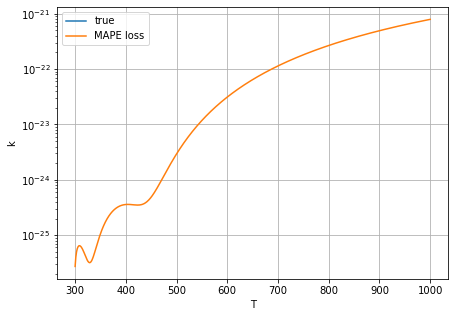

Poly_size: 9
Coefs: [ 3.81001948e-19 -1.35565305e-17  1.92807459e-16 -1.36903919e-15
  4.83613996e-15 -6.63301781e-15 -1.02297145e-15  6.35587598e-16
  3.05246498e-15]
MAPE_score: nan %


<ipython-input-96-3264d6b085e0>:46: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100


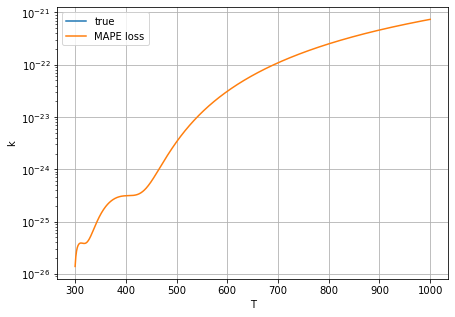

Poly_size: 10
Poly_size: 11
Poly_size: 12
Coefs: [ 3.14906583e-19 -1.04044418e-17  1.31809385e-16 -7.61702720e-16
  1.64273814e-15  9.47390117e-16 -2.36211283e-15 -1.45531109e-14
  8.16584148e-16 -3.25877855e-14  6.53820580e-15 -7.29459707e-15]
MAPE_score: nan %


<ipython-input-96-3264d6b085e0>:46: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100


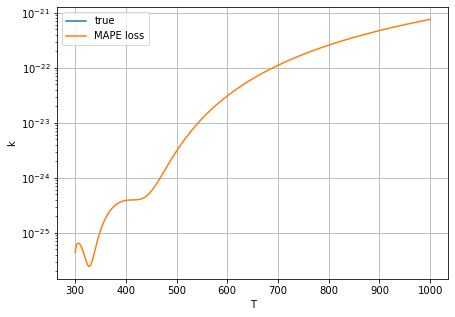

Poly_size: 13
Poly_size: 14
Poly_size: 15
Poly_size: 16
Poly_size: 17
Poly_size: 18
Poly_size: 19
Coefs: [ 1.70741783e-18 -6.68445034e-17  1.05294998e-15 -8.29191836e-15
  3.16576840e-14 -3.62543347e-14 -5.87693800e-14 -1.18830520e-13
  8.24365543e-13  5.86148660e-14 -5.09921222e-13  1.42559441e-12
  7.78591584e-13  2.21055206e-16 -4.52050986e-13  1.00000000e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15]
MAPE_score: nan %


<ipython-input-96-3264d6b085e0>:46: RuntimeWarning: invalid value encountered in double_scalars
  score = np.sum([metric(res_metric.x, *pair, coef_num, 0) for pair in zip(X_for_score, y_for_score)])/len(X_for_score)*100


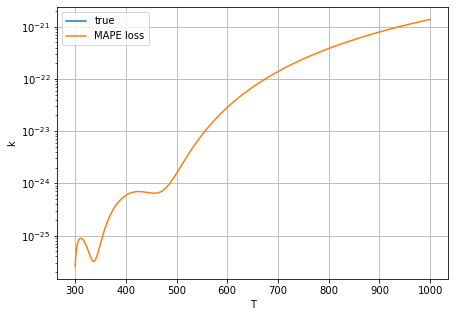

Poly_size: 20
Poly_size: 21
Poly_size: 22
Poly_size: 23
Poly_size: 24
Poly_size: 25
Poly_size: 26
Poly_size: 27
Poly_size: 28
Poly_size: 29
Poly_size: 30
Poly_size: 31
Poly_size: 32
Poly_size: 33
Poly_size: 34
Poly_size: 35
Poly_size: 36
Poly_size: 37
Poly_size: 38
Poly_size: 39
Poly_size: 40


UnboundLocalError: local variable 'poly_len' referenced before assignment

In [97]:
T_pairs = [(300, 1000), (1000, 2200), (1800, 15000)]

df = pd.read_csv('kvt_FHO-FR.txt', sep=' ')

T_dev = 100
test_sizes = [0.1, 0.7, 0.1]
levels_count = 3

kvt(df, T_pairs, T_dev, test_sizes, levels_count)

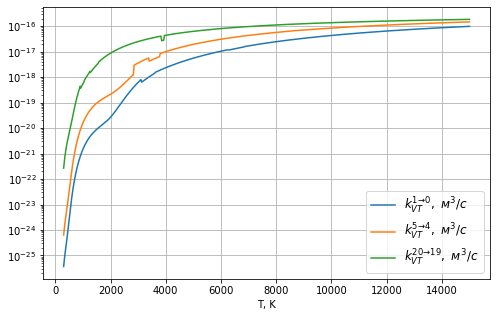

In [1000]:
print(coef_1_300_800, coef_1_800_1500, coef_1500_4200, coef_4200_15000)

[ 3.42422068e-19 -1.19764608e-17  1.65376891e-16 -1.11150213e-15
  3.47039283e-15 -2.86306553e-15 -4.68984158e-15 -1.06463388e-15
  5.99314597e-16  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15  1.00000000e-15] [ 2.42812892e-17 -1.14919438e-15  2.24337707e-14 -2.29587081e-13
  1.27676945e-12 -3.44791524e-12  2.19066957e-12  4.85159526e-12
  1.30425626e-12  2.05782495e-12 -9.49924657e-14  1.51603300e-12
  1.07223629e-12 -6.51992594e-16 -6.51992594e-16 -6.51992594e-16
 -6.51992594e-16 -6.51992594e-16 -6.51992594e-16 -6.51992594e-16
 -6.51992594e-16  2.25029379e-14 -6.83267868e-14  7.95213135e-13
  2.63130155e-15  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15  1.00000000e-15
  1.00000000e-15  1.00000000e-15  1.00000000e-15  1.0000

In [1025]:
X_300_800 = np.linspace(300, 799, 100)
X_800_1500 = np.linspace(842, 1499, 100)
X_1500_4200 = np.linspace(1600, 4100, 100)
X_4200_15000 = np.linspace(4200, 15000, 100)

y_300_800 = [get_coef(coef_1_300_800, xs, 9) for xs in X_300_800]
y_800_1500 = [get_coef(coef_1_800_1500, xs, 30) for xs in X_800_1500]
y_1500_4200 = [get_coef(coef_1500_4200, xs, 10) for xs in X_1500_4200]
y_4200_15000 = [get_coef(coef_4200_15000, xs, 4) for xs in X_4200_15000]



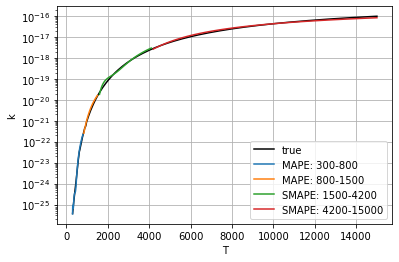

In [1026]:
plt.plot(X, y,'black', label='true')
plt.plot(X_300_800, y_300_800, label='MAPE: 300-800')
plt.plot(X_800_1500, y_800_1500, label='MAPE: 800-1500')
plt.plot(X_1500_4200, y_1500_4200, label='SMAPE: 1500-4200')
plt.plot(X_4200_15000, y_4200_15000, label='SMAPE: 4200-15000')
plt.yscale("logit")
plt.xlabel("T")
plt.ylabel("k")
plt.grid()
plt.legend()
#plt.show()
plt.savefig('res3.png', dpi=300)

In [248]:
(9.93+ 9.68+ 9.43+ 11.65+ 10.77 +10.37 +10.22 +9.99+ 13.52+ 13.94+ 13.54 +11.50+ 11.95+ 11.37+  12.42+ 12.36+  10.76+ 8.84+ 9.33+ 6.32 +6.19+ 5.03+  3.71 + 3.29 +2.73 +2.52 +2.57+ 2.93+ 2.89 +3.03 +3.89 + 2.89 +2.11+  2.01 + 1.31 )/35 

7.571142857142855

### OLD

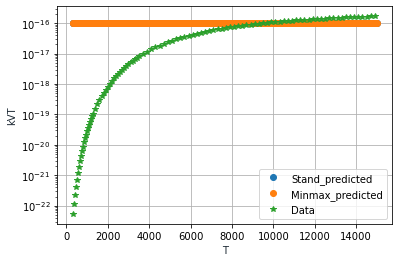

Model: knn
R^2 :  0.9995505607399535
MAE : 7.289102669662191e-19
RMSE: 1.1978764078603049e-18

R^2 :  0.9995479296180941
MAE : 7.334842078889806e-19
RMSE: 1.2013776145328594e-18

R^2 :  -0.2786240823528816
MAE : 4.2312670163800925e-17
RMSE: 5.813007987206468e-17

R^2 :  0.9995031390465907
MAE : 6.810062528462095e-19
RMSE: 1.1459005131561572e-18

---------------------------------------------------------


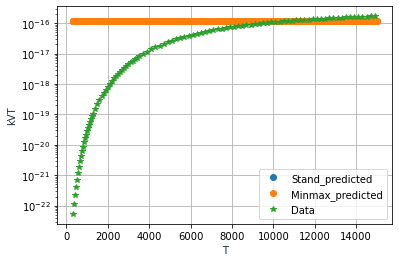

Model: dtree
R^2 :  0.8589564616217017
MAE : 1.5456366460355104e-17
RMSE: 2.122037749807352e-17

R^2 :  0.8589564616217017
MAE : 1.5456366460355104e-17
RMSE: 2.122037749807352e-17

R^2 :  -0.007499092945875585
MAE : 3.5856154820490055e-17
RMSE: 5.160025069724096e-17

R^2 :  0.7897758786461216
MAE : 1.7385676873896195e-17
RMSE: 2.3570606235777176e-17

---------------------------------------------------------


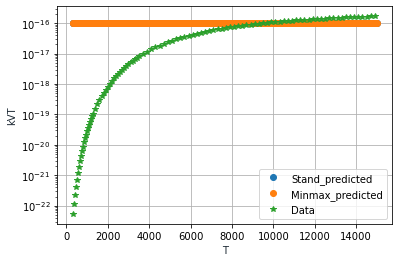

Model: randfor
R^2 :  0.999847393272182
MAE : 4.1472822257868873e-19
RMSE: 6.980127383515679e-19

R^2 :  0.999840564422263
MAE : 4.259593154170631e-19
RMSE: 7.134591762761451e-19

R^2 :  -0.2898286196616706
MAE : 4.26070316307756e-17
RMSE: 5.838422024081764e-17

R^2 :  0.9998603705007834
MAE : 3.554575256796461e-19
RMSE: 6.074605372854536e-19

---------------------------------------------------------


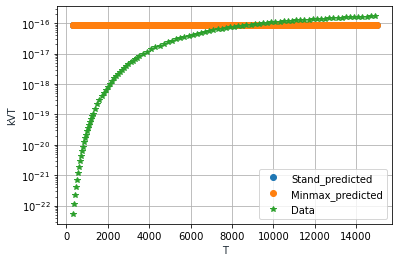

Model: svr_rbf
R^2 :  -0.02759312501666722
MAE : 5.060526617735688e-17
RMSE: 5.727790214565698e-17

R^2 :  -0.02759312501666722
MAE : 5.060526617735688e-17
RMSE: 5.727790214565698e-17

R^2 :  -0.0006411457597663706
MAE : 4.468778719780074e-17
RMSE: 5.1424331906113594e-17

R^2 :  -0.0006411457597663706
MAE : 4.468778719780074e-17
RMSE: 5.1424331906113594e-17

---------------------------------------------------------


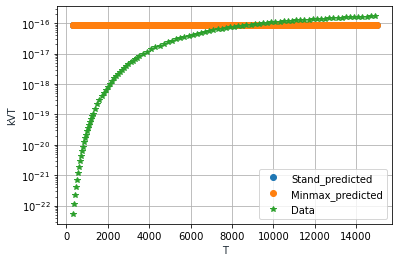

Model: svr_lin
R^2 :  -0.02759312501666722
MAE : 5.060526617735688e-17
RMSE: 5.727790214565698e-17

R^2 :  -0.02759312501666722
MAE : 5.060526617735688e-17
RMSE: 5.727790214565698e-17

R^2 :  -0.0006411457597663706
MAE : 4.468778719780074e-17
RMSE: 5.1424331906113594e-17

R^2 :  -0.0006411457597663706
MAE : 4.468778719780074e-17
RMSE: 5.1424331906113594e-17

---------------------------------------------------------


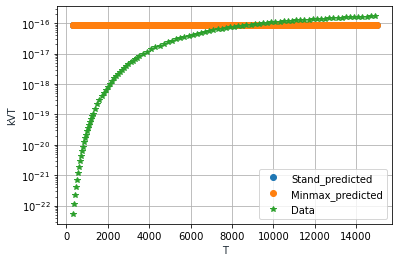

Model: svr_poly
R^2 :  -0.01525509556320137
MAE : 5.080300036357632e-17
RMSE: 5.693300369542005e-17

R^2 :  -0.01525509556320137
MAE : 5.080300036357632e-17
RMSE: 5.693300369542005e-17

R^2 :  -0.0004623426067491554
MAE : 4.514099190391897e-17
RMSE: 5.141973723023243e-17

R^2 :  -0.0004623426067491554
MAE : 4.514099190391897e-17
RMSE: 5.141973723023243e-17

---------------------------------------------------------


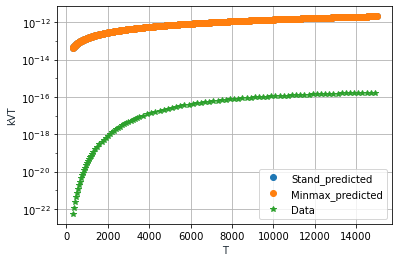

Model: sgd
R^2 :  0.7838725951198627
MAE : 2.2639589966037815e-17
RMSE: 2.6268267337693684e-17

R^2 :  0.7724919498421987
MAE : 2.411605907265446e-17
RMSE: 2.695100051495395e-17

R^2 :  -3.5975877462247148
MAE : 9.998976150630713e-17
RMSE: 1.1022865114385724e-16

R^2 :  0.7164422315778998
MAE : 2.4247052789940695e-17
RMSE: 2.737475585990642e-17

---------------------------------------------------------


In [48]:
#Datasets download
df = pd.read_csv('FHO_kvt_with_adaptive_step.txt', sep=' ')
df_step = pd.read_csv('FHO_kvt.txt', sep=' ')

#Data scalers
stand_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

#Get data
X = df.drop(['i-1','kVT'],axis=1)
y = df['kVT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#Scaling test and train data
X_train_stand = stand_scaler.fit_transform(X_train)
X_test_stand = stand_scaler.transform(X_test)
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

#Test data from another dataset
X_step_stand = stand_scaler.transform(df_step.drop(['i-1','kVT'], axis=1))
X_step_minmax = minmax_scaler.transform(df_step.drop(['i-1','kVT'], axis=1))
y_test_step = df_step['kVT']

#Models
knn = KNeighborsRegressor(n_neighbors=3)
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
randfor = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="scale", degree=3, epsilon=1e-20, coef0=1)
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

models = [knn, dtree, randfor, svr_rbf, svr_lin, svr_poly, sgd]
models_names = ['knn', 'dtree', 'randfor', 'svr_rbf', 'svr_lin', 'svr_poly', 'sgd']

test_data = np.array(range(300,15025,25))
test_data = test_data.reshape((len(test_data),1))
test_data = np.hstack((np.ones((len(test_data),1)), test_data))

#Models training and results
for pair in zip(models_names, models):
    model_name = pair[0]
    model = pair[1]
    
    model_stand = model.fit(X_train_stand, y_train)
    y_pred_stand = model_stand.predict(X_test_stand)
    
    model_minmax = model.fit(X_train_minmax, y_train)
    y_pred_minmax = model_minmax.predict(X_test_minmax)
    
    plt.plot(test_data[:,1], model_stand.predict(test_data), 'o', label='Stand_predicted')
    plt.plot(test_data[:,1], model_minmax.predict(test_data), 'o', label='Minmax_predicted')
    plt.plot(df[df['i']==1]['T'][::2], df[df['i']==1]['kVT'][::2], '*', label='Data')
    plt.legend(loc='lower right')
    plt.yscale("logit")

    plt.xlabel('T', color='#1C2833')
    plt.ylabel('kVT', color='#1C2833')
    plt.grid()
    plt.show()
    
    print(f'Model: {model_name}')
    for y_pred in (y_pred_stand, y_pred_minmax):
        print("R^2 : ", r2_score(y_test, y_pred))
        print("MAE :", mean_absolute_error(y_test,y_pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
        print()
    
    y_step_pred_stand = model_stand.predict(X_step_stand)
    y_step_pred_minmax = model_minmax.predict(X_step_minmax)
    
    for y_step_pred in (y_step_pred_stand, y_step_pred_minmax):
        print("R^2 : ", r2_score(y_test_step, y_step_pred))
        print("MAE :", mean_absolute_error(y_test_step,y_step_pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test_step, y_step_pred)))
        print()
    print('---------------------------------------------------------')

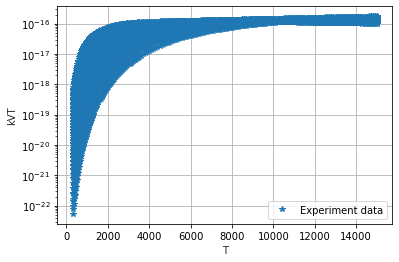

In [6]:
plt.plot(df['T'], df['kVT'], '*', label='Data')
plt.legend(loc='lower right')
plt.xlabel('T', color='#1C2833')
plt.ylabel('kVT', color='#1C2833')
plt.yscale("logit")
plt.grid()
plt.show()

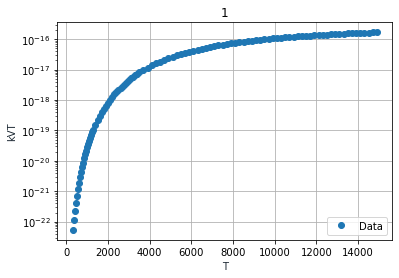

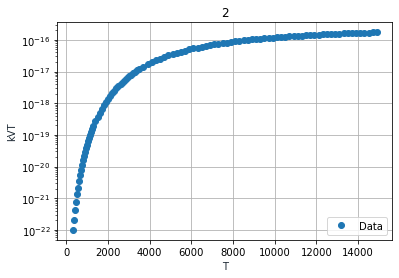

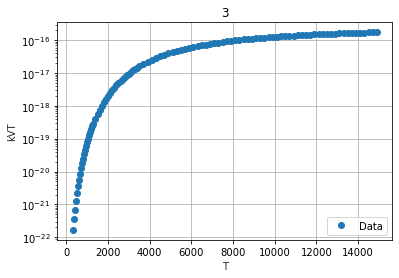

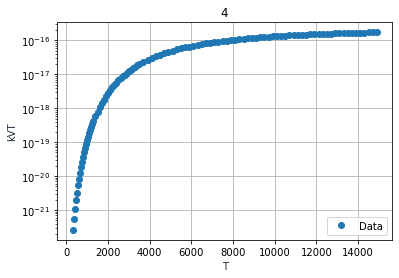

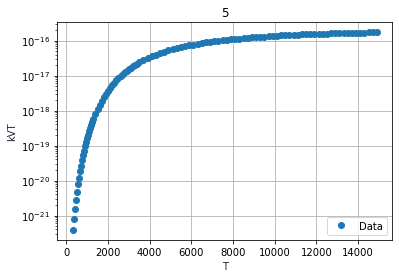

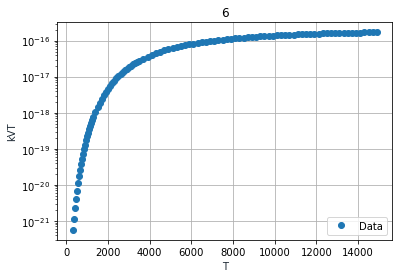

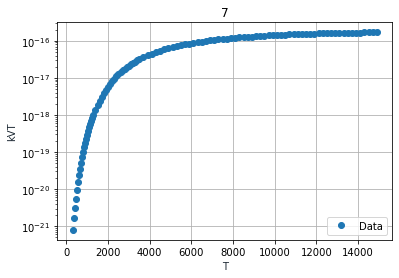

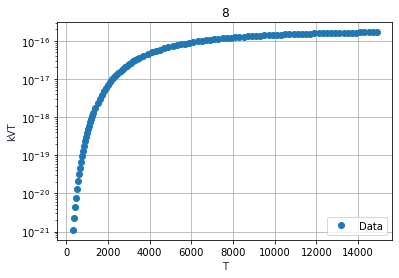

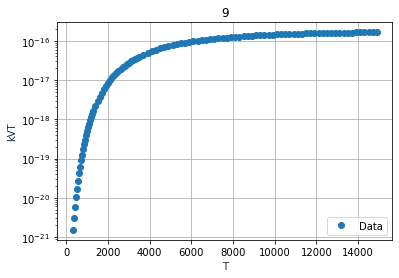

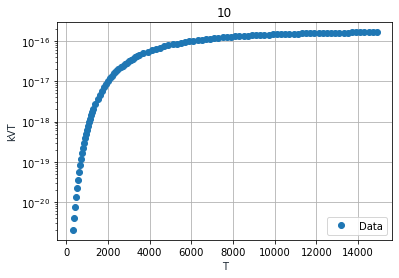

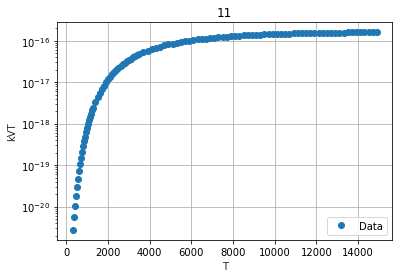

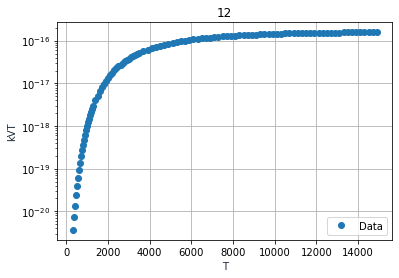

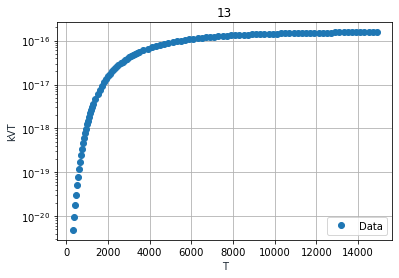

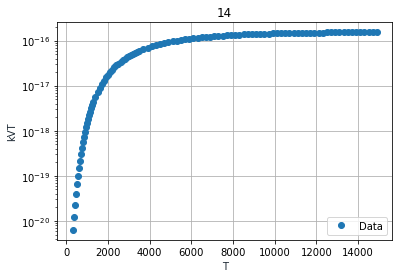

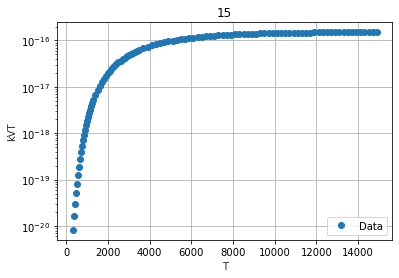

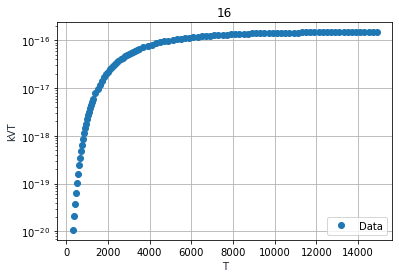

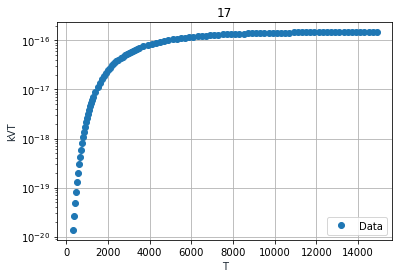

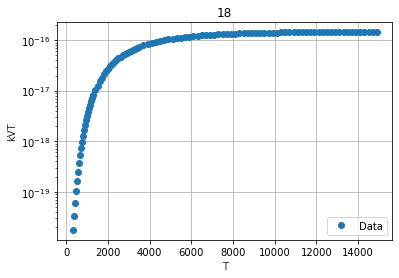

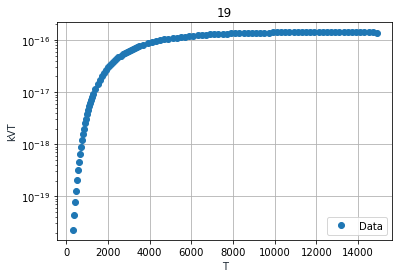

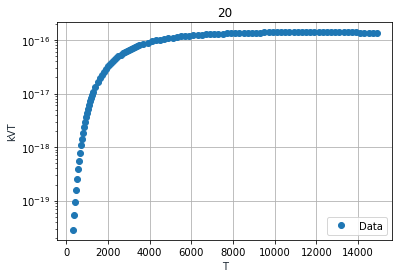

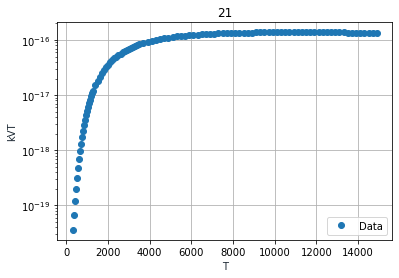

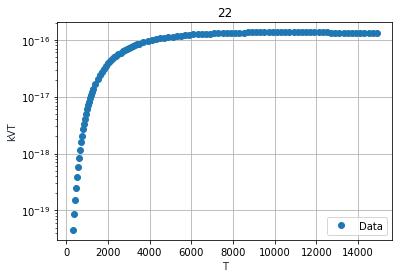

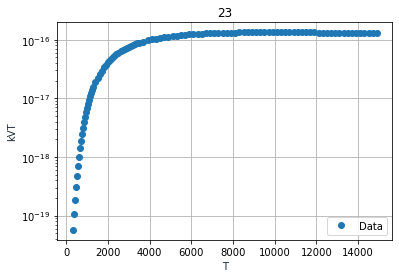

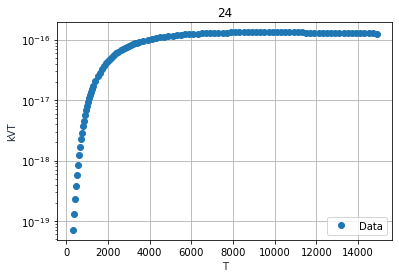

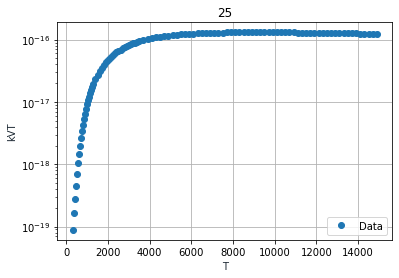

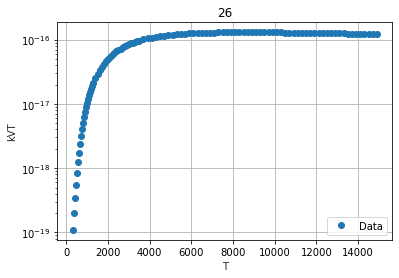

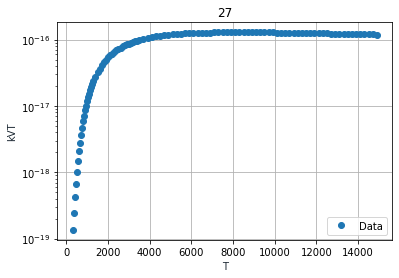

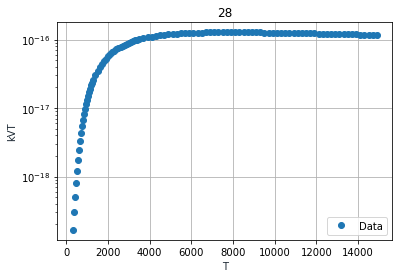

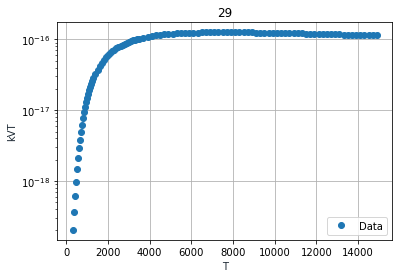

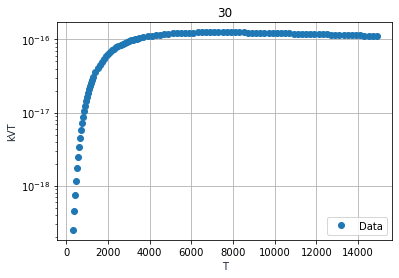

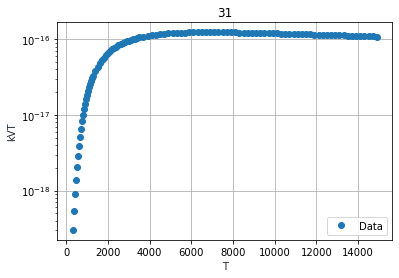

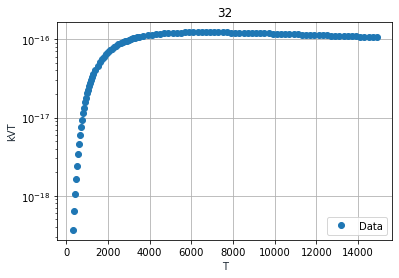

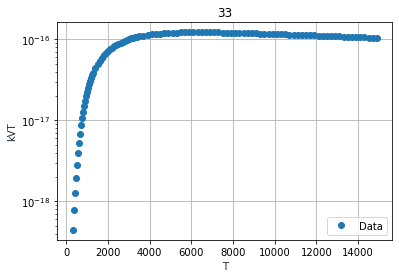

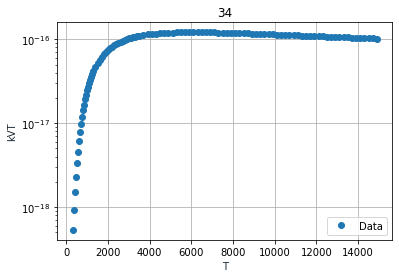

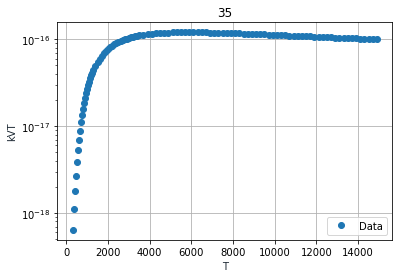

In [17]:
for i in range(1,36):
    plt.plot(df[df['i']==i]['T'][::2], df[df['i']==i]['kVT'][::2], 'o', label='Data')
    plt.title(f'{i}')
    plt.legend(loc='lower right')
    plt.yscale("logit")
    
    plt.xlabel('T', color='#1C2833')
    plt.ylabel('kVT', color='#1C2833')
    plt.grid()
    plt.show()

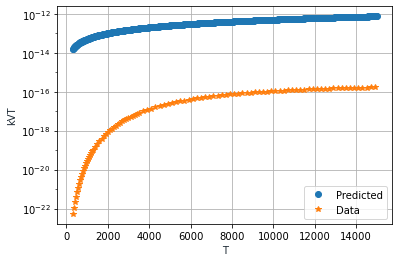

Model: sgd
R^2 :  0.9616480685990134
MAE : 1.0934428816029489e-17
RMSE: 1.2309625030715068e-17

R^2 :  0.37495371781596976
MAE : 4.2753552749236554e-17
RMSE: 4.9694381773348283e-17

---------------------------------------------------------


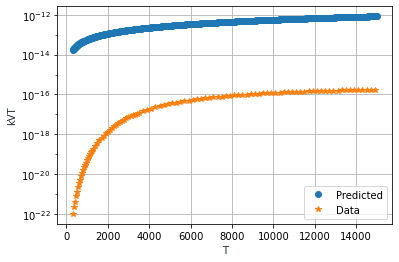

Model: sgd
R^2 :  0.9763759558484351
MAE : 9.095891036081688e-18
RMSE: 9.839040687525797e-18

R^2 :  0.4686860610701875
MAE : 4.2065047609747355e-17
RMSE: 4.666069879675865e-17

---------------------------------------------------------


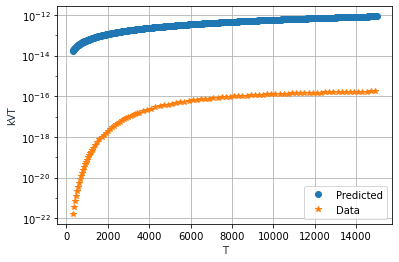

Model: sgd
R^2 :  0.9767191317728392
MAE : 8.083485336364521e-18
RMSE: 9.61245885548083e-18

R^2 :  0.47748173571659236
MAE : 3.899971610284535e-17
RMSE: 4.553922604041613e-17

---------------------------------------------------------


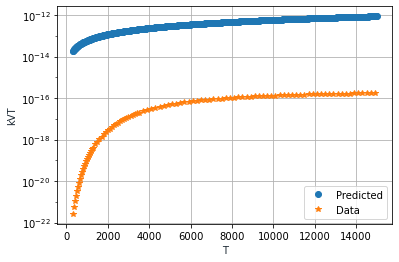

Model: sgd
R^2 :  0.9640724050627982
MAE : 9.33482703305453e-18
RMSE: 1.0777609279112302e-17

R^2 :  0.48370248858278564
MAE : 3.498324410449614e-17
RMSE: 4.08562383141149e-17

---------------------------------------------------------


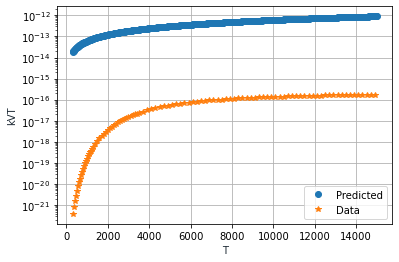

Model: sgd
R^2 :  0.9258662715789927
MAE : 1.2503374559599127e-17
RMSE: 1.4656468161206465e-17

R^2 :  0.37134030055805856
MAE : 3.734284862362836e-17
RMSE: 4.268047241497232e-17

---------------------------------------------------------


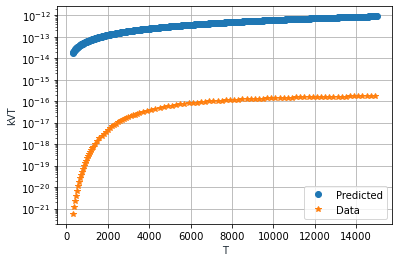

Model: sgd
R^2 :  0.9694526031843326
MAE : 9.449626084857867e-18
RMSE: 1.0940217227976855e-17

R^2 :  0.4879369744323345
MAE : 4.092148522387868e-17
RMSE: 4.479200996656348e-17

---------------------------------------------------------


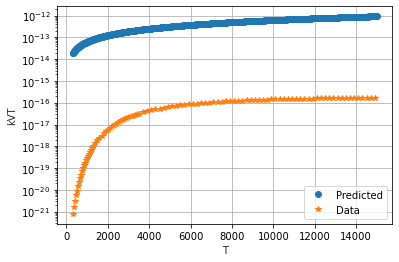

Model: sgd
R^2 :  0.9649897587192949
MAE : 9.422624822348242e-18
RMSE: 1.1849847604106608e-17

R^2 :  0.4679593478612608
MAE : 4.282370045765617e-17
RMSE: 4.6194218235563426e-17

---------------------------------------------------------


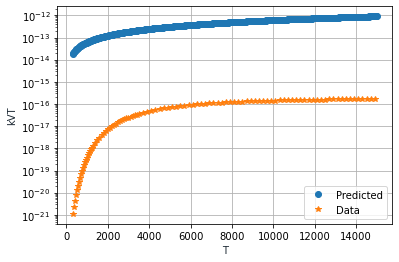

Model: sgd
R^2 :  0.9263296398957499
MAE : 1.4428014273240812e-17
RMSE: 1.6859519104925696e-17

R^2 :  0.4465419635342548
MAE : 4.37039765075978e-17
RMSE: 4.621054977597326e-17

---------------------------------------------------------


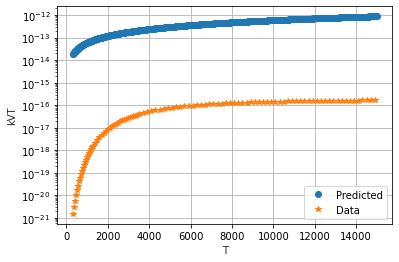

Model: sgd
R^2 :  0.9348318465448242
MAE : 1.344988404242493e-17
RMSE: 1.6229741269062224e-17

R^2 :  0.4245083378851704
MAE : 4.505624021411352e-17
RMSE: 4.8229571861975617e-17

---------------------------------------------------------


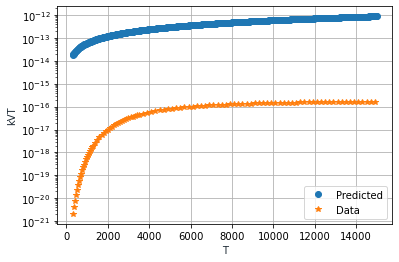

Model: sgd
R^2 :  0.9499540594331142
MAE : 1.341282876228312e-17
RMSE: 1.5785140578085e-17

R^2 :  0.506466605425095
MAE : 4.897729802166737e-17
RMSE: 4.9570385705459334e-17

---------------------------------------------------------


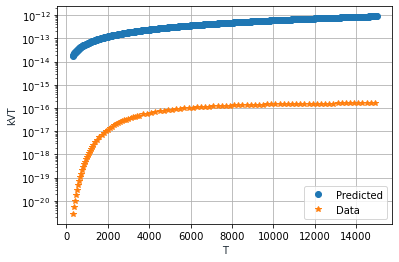

Model: sgd
R^2 :  0.9171996061116249
MAE : 1.54882557820943e-17
RMSE: 1.8489607896406733e-17

R^2 :  0.48589872518081534
MAE : 4.38778398438164e-17
RMSE: 4.607187002460568e-17

---------------------------------------------------------


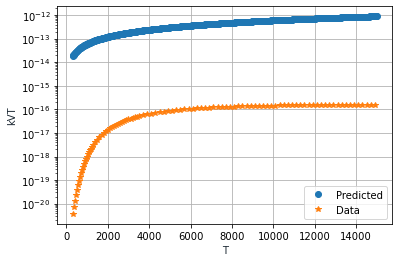

Model: sgd
R^2 :  0.8651039007011236
MAE : 1.7875657559171775e-17
RMSE: 2.1869129564056994e-17

R^2 :  0.47527574113208015
MAE : 4.206416585616661e-17
RMSE: 4.313177918544217e-17

---------------------------------------------------------


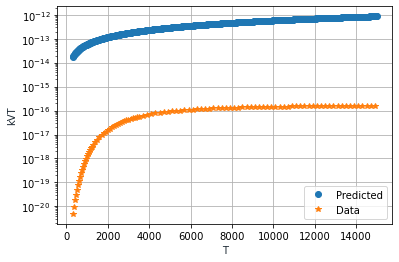

Model: sgd
R^2 :  0.923158823372925
MAE : 1.6577361120419273e-17
RMSE: 1.9022036032379006e-17

R^2 :  0.4786266695346716
MAE : 4.8189282199231804e-17
RMSE: 4.954894397497079e-17

---------------------------------------------------------


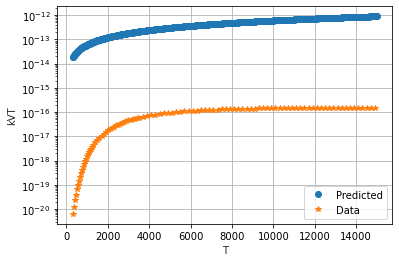

Model: sgd
R^2 :  0.8832117210569156
MAE : 1.6032291332879756e-17
RMSE: 1.928730142840935e-17

R^2 :  0.4240062834841287
MAE : 4.034571901530732e-17
RMSE: 4.2833218780047013e-17

---------------------------------------------------------


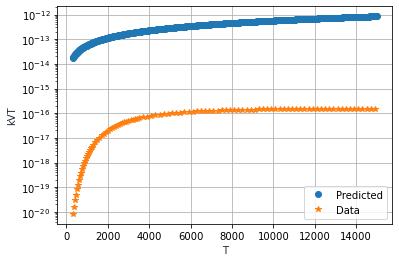

Model: sgd
R^2 :  0.8635870721473267
MAE : 2.020022206723091e-17
RMSE: 2.226068777154142e-17

R^2 :  0.44508296341189946
MAE : 4.258660815731094e-17
RMSE: 4.4897777385645774e-17

---------------------------------------------------------


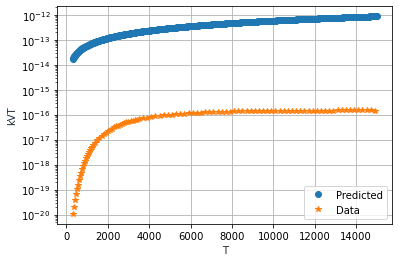

Model: sgd
R^2 :  0.8652154562386529
MAE : 1.6512131521438814e-17
RMSE: 2.0547827201122142e-17

R^2 :  0.38101935122282726
MAE : 4.177536924381943e-17
RMSE: 4.403362041215094e-17

---------------------------------------------------------


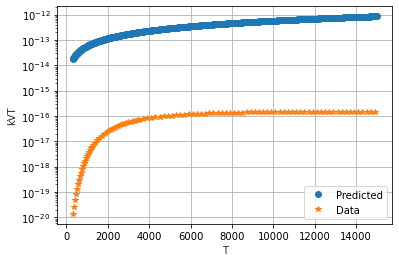

Model: sgd
R^2 :  0.8433666382962907
MAE : 1.9316806884104432e-17
RMSE: 2.3297960149743304e-17

R^2 :  0.47742409846676237
MAE : 3.919556850032799e-17
RMSE: 4.255498608435482e-17

---------------------------------------------------------


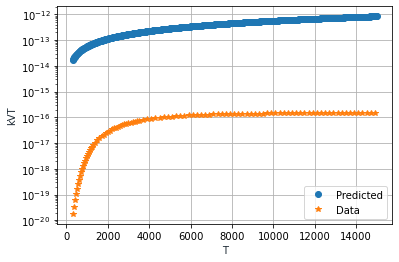

Model: sgd
R^2 :  0.8816896146713319
MAE : 1.710755977117578e-17
RMSE: 1.9238370131096064e-17

R^2 :  0.49216843740410043
MAE : 3.446862133690479e-17
RMSE: 3.985810861593023e-17

---------------------------------------------------------


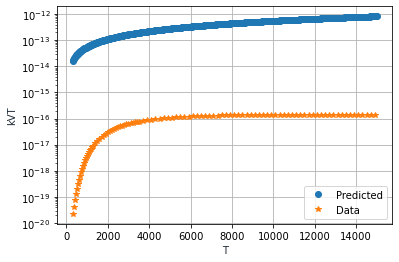

Model: sgd
R^2 :  0.7078987105611053
MAE : 2.4452541773261047e-17
RMSE: 2.661192532798994e-17

R^2 :  0.4193637211130623
MAE : 3.39179822763074e-17
RMSE: 3.751989746951838e-17

---------------------------------------------------------


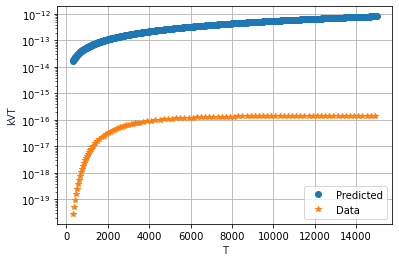

Model: sgd
R^2 :  0.7054042530109681
MAE : 2.3180186959546524e-17
RMSE: 2.6565834440498022e-17

R^2 :  0.3951761165180625
MAE : 3.5082265710900445e-17
RMSE: 3.806489985983198e-17

---------------------------------------------------------


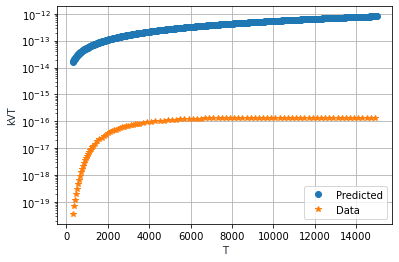

Model: sgd
R^2 :  0.7172461771704555
MAE : 2.5795825036953777e-17
RMSE: 2.9490661609235624e-17

R^2 :  0.41996640648382233
MAE : 3.8896985792491177e-17
RMSE: 4.223834048778054e-17

---------------------------------------------------------


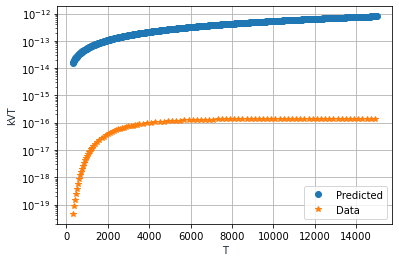

Model: sgd
R^2 :  0.7637346648985949
MAE : 2.3947982451157005e-17
RMSE: 2.6330397186310814e-17

R^2 :  0.44324464411134146
MAE : 3.566905653404712e-17
RMSE: 4.041937640433097e-17

---------------------------------------------------------


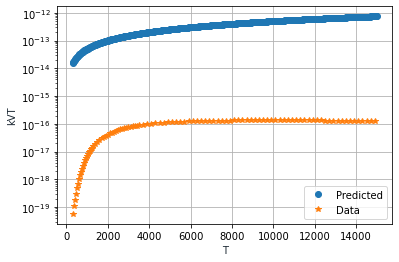

Model: sgd
R^2 :  0.5510672167223996
MAE : 2.678270020921946e-17
RMSE: 2.98559999672846e-17

R^2 :  0.34595918490417243
MAE : 3.29331342939572e-17
RMSE: 3.603656494270168e-17

---------------------------------------------------------


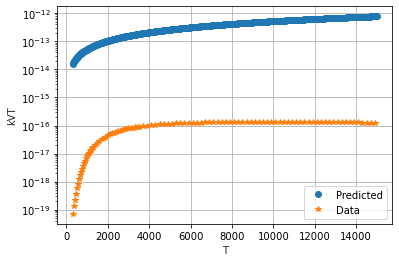

Model: sgd
R^2 :  0.7295867035616673
MAE : 2.200772699767224e-17
RMSE: 2.5047022580077592e-17

R^2 :  0.48307770484439905
MAE : 3.050191192229575e-17
RMSE: 3.463017753937811e-17

---------------------------------------------------------


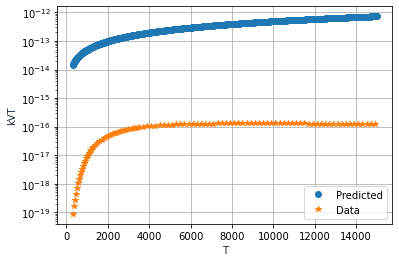

Model: sgd
R^2 :  0.6084676665505501
MAE : 2.804731785280568e-17
RMSE: 3.0681486625764165e-17

R^2 :  0.3458187793893006
MAE : 3.586266506316986e-17
RMSE: 3.965898718261845e-17

---------------------------------------------------------


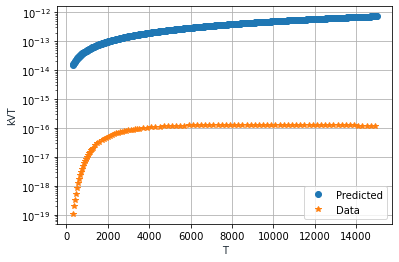

Model: sgd
R^2 :  0.6527200357426439
MAE : 2.5873870277395062e-17
RMSE: 2.9229373482563505e-17

R^2 :  0.4074048184743483
MAE : 3.349160911041381e-17
RMSE: 3.8182002384356826e-17

---------------------------------------------------------


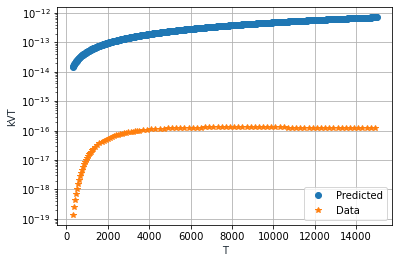

Model: sgd
R^2 :  0.7489084267334488
MAE : 2.1581996833629057e-17
RMSE: 2.5356554099157582e-17

R^2 :  0.453587756051824
MAE : 3.163966933385807e-17
RMSE: 3.740540624590627e-17

---------------------------------------------------------


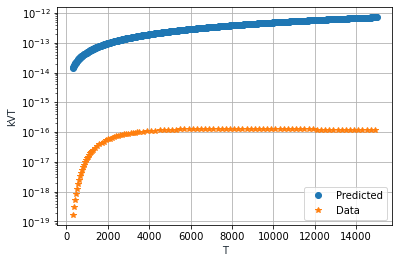

Model: sgd
R^2 :  0.5346830631414846
MAE : 2.8143515711721046e-17
RMSE: 3.092708711022462e-17

R^2 :  0.35566479733069967
MAE : 3.18581594869437e-17
RMSE: 3.639322286407958e-17

---------------------------------------------------------


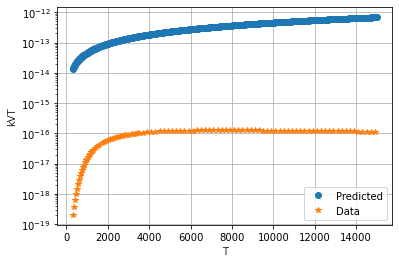

Model: sgd
R^2 :  0.6272947343185065
MAE : 2.6538795863831186e-17
RMSE: 2.870182518390709e-17

R^2 :  0.4144765605832369
MAE : 2.7672022584109312e-17
RMSE: 3.597484183622592e-17

---------------------------------------------------------


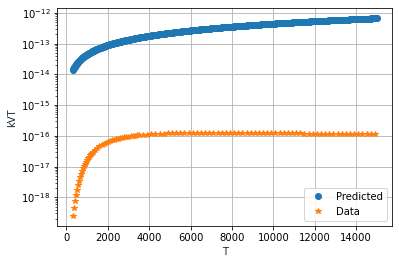

Model: sgd
R^2 :  0.09645837679055203
MAE : 2.5683354034426168e-17
RMSE: 3.024528094448595e-17

R^2 :  0.1212269327683293
MAE : 2.6048197790405227e-17
RMSE: 2.9827847230126366e-17

---------------------------------------------------------


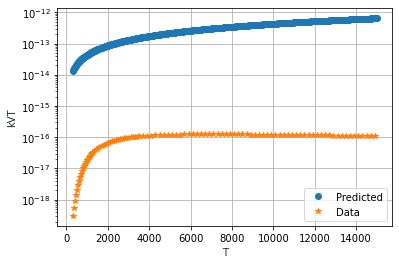

Model: sgd
R^2 :  0.570315921804414
MAE : 2.5776649497883124e-17
RMSE: 2.898322357762632e-17

R^2 :  0.3829117882080615
MAE : 2.866728204766571e-17
RMSE: 3.473327072655018e-17

---------------------------------------------------------


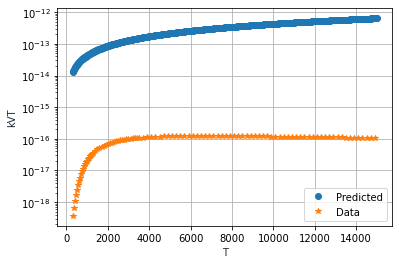

Model: sgd
R^2 :  0.19126705265786015
MAE : 2.5426430442731176e-17
RMSE: 3.101238194926128e-17

R^2 :  0.19338195503941835
MAE : 2.6911227045890556e-17
RMSE: 3.097180545462913e-17

---------------------------------------------------------


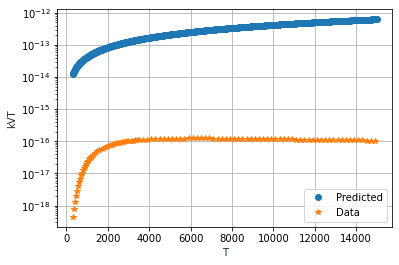

Model: sgd
R^2 :  0.367883445886818
MAE : 3.1620321382240575e-17
RMSE: 3.448123540246756e-17

R^2 :  0.2836334262065824
MAE : 3.175269824454409e-17
RMSE: 3.670725358306466e-17

---------------------------------------------------------


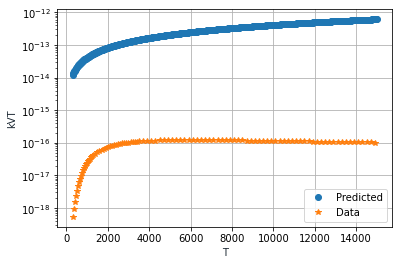

Model: sgd
R^2 :  0.278252506749201
MAE : 2.223707901646367e-17
RMSE: 2.6288198794248603e-17

R^2 :  0.31523321556921136
MAE : 1.9742746282361743e-17
RMSE: 2.5605869704758806e-17

---------------------------------------------------------


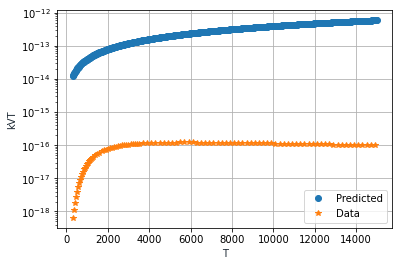

Model: sgd
R^2 :  0.5389013946256015
MAE : 2.3527839067974976e-17
RMSE: 2.836241170278804e-17

R^2 :  0.36950028531500945
MAE : 2.716121709268081e-17
RMSE: 3.316566423774875e-17

---------------------------------------------------------


In [51]:
for i in range(1,36):
    X = np.array(df[df['i']==i]['T']).reshape(-1, 1)
    y = df[df['i']==i]['kVT']

    #Data scalers
    stand_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    #Scaling test and train data
    X_train_stand = stand_scaler.fit_transform(X_train)
    X_test_stand = stand_scaler.transform(X_test)

    X_train_minmax = minmax_scaler.fit_transform(X_train)
    X_test_minmax = minmax_scaler.transform(X_test)

    model = SGDRegressor(loss='huber',
                         penalty='l2',
                         max_iter=1e3, 
                         tol=1e-3)

    model_stand = model.fit(X_train_stand, y_train)
    y_pred_stand = model_stand.predict(X_test_stand)

    model_minmax = model.fit(X_train_minmax, y_train)
    y_pred_minmax = model_minmax.predict(X_test_minmax)

    plt.plot(test_data[:,1], model_stand.predict(test_data[:,1].reshape(-1, 1)), 'o', label='Predicted')
    plt.plot(df[df['i']==i]['T'][::2], df[df['i']==i]['kVT'][::2], '*', label='Data')
    plt.legend(loc='lower right')
    plt.yscale("logit")

    plt.xlabel('T', color='#1C2833')
    plt.ylabel('kVT', color='#1C2833')
    plt.grid()
    plt.show()

    print(f'Model: {model_name}')
    for y_pred in (y_pred_stand, y_pred_minmax):
        print("R^2 : ", r2_score(y_test, y_pred))
        print("MAE :", mean_absolute_error(y_test,y_pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
        print()
    print('---------------------------------------------------------')

In [52]:
model_stand.predict(test_data[:,1].reshape(-1, 1))

array([1.17744108e-14, 1.27498495e-14, 1.37252883e-14, 1.47007270e-14,
       1.56761657e-14, 1.66516044e-14, 1.76270431e-14, 1.86024818e-14,
       1.95779205e-14, 2.05533593e-14, 2.15287980e-14, 2.25042367e-14,
       2.34796754e-14, 2.44551141e-14, 2.54305528e-14, 2.64059915e-14,
       2.73814303e-14, 2.83568690e-14, 2.93323077e-14, 3.03077464e-14,
       3.12831851e-14, 3.22586238e-14, 3.32340626e-14, 3.42095013e-14,
       3.51849400e-14, 3.61603787e-14, 3.71358174e-14, 3.81112561e-14,
       3.90866948e-14, 4.00621336e-14, 4.10375723e-14, 4.20130110e-14,
       4.29884497e-14, 4.39638884e-14, 4.49393271e-14, 4.59147658e-14,
       4.68902046e-14, 4.78656433e-14, 4.88410820e-14, 4.98165207e-14,
       5.07919594e-14, 5.17673981e-14, 5.27428368e-14, 5.37182756e-14,
       5.46937143e-14, 5.56691530e-14, 5.66445917e-14, 5.76200304e-14,
       5.85954691e-14, 5.95709078e-14, 6.05463466e-14, 6.15217853e-14,
       6.24972240e-14, 6.34726627e-14, 6.44481014e-14, 6.54235401e-14,
      

In [4]:
#data processing
file1 = open('kvt_FHO_with_adaptive_step.txt', 'r')
lines = file1.readlines()

for i in range(len(lines)):
    lines[i] = ' '.join(lines[i].split()) + '\n'
    
file1 = open('FHO_kvt_with_adaptive_step.txt', 'w')
file1.writelines(lines)
file1.close()